##### ----------------------Notes---------------------
* This code DOES NOT use regridded datafiles.

##### ------------------------------------------------

### Set up workspace

In [2]:
import sys
sys.path.append('../')

In [3]:
######################## Load modules ###################################
%matplotlib inline
import sys
import importlib
import time
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

####################### Set up directory structure ######################
from plants_and_TCR.analyze_data import make_tcr_dataset
from plants_and_TCR.analysis_parameters import directory_information
from plants_and_TCR.process_data import calculate_tcr_time_series

path_output = directory_information.DIR_PROCESSED_DATA
FIGURE_PATH = directory_information.DIR_OUTPUT_FIGURES

In [4]:
FONTSIZE=20

# Calculate TCRs

In [4]:
# Calculate from scratch
TCR_DICT = calculate_tcr_time_series.create_tcr_datasets(tcr_types=['RAD','TOT','PHYS','TOT-RAD'],
                                                         average_types=['global','land'],
                                                         save_tcr_dict=True,
                                                         recalculate_TCRs=True)

bcc-csm1-1
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
CanESM2
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> deleting previously calculated PI control
------PHYS------
>> calculating PI control
>> deleting previously calculated PI control
------TOT-RAD------
------RAD------
>> calculating PI control
>> deleting previously calculated PI control
------TOT------
>> calculating PI control
>> del

In [5]:
# Load precalculated
DIR_TCR_DICT = directory_information.DIR_TCR_DICT
TCR_DICT = pickle.load(open(DIR_TCR_DICT+'TCR_dict.pickle', "rb"))

### Calculate TCRs

In [6]:
end_yr=70
cmip_cutoff=8
globalTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='global',
                                              tcr_types=['RAD','TOT'])
landTCR = make_tcr_dataset.make_tcr_dataset(TCR_DICT,
                                              end_yr=end_yr,
                                              varname='tas',
                                              average_type='land',
                                              tcr_types=['RAD','TOT'])

globalTCR_CMIP5 = globalTCR[0:cmip_cutoff]
globalTCR_CMIP6 = globalTCR[cmip_cutoff:len(globalTCR)]
landTCR_CMIP5 = landTCR[0:cmip_cutoff]
landTCR_CMIP6 = landTCR[cmip_cutoff:len(landTCR)]

# Figure 5

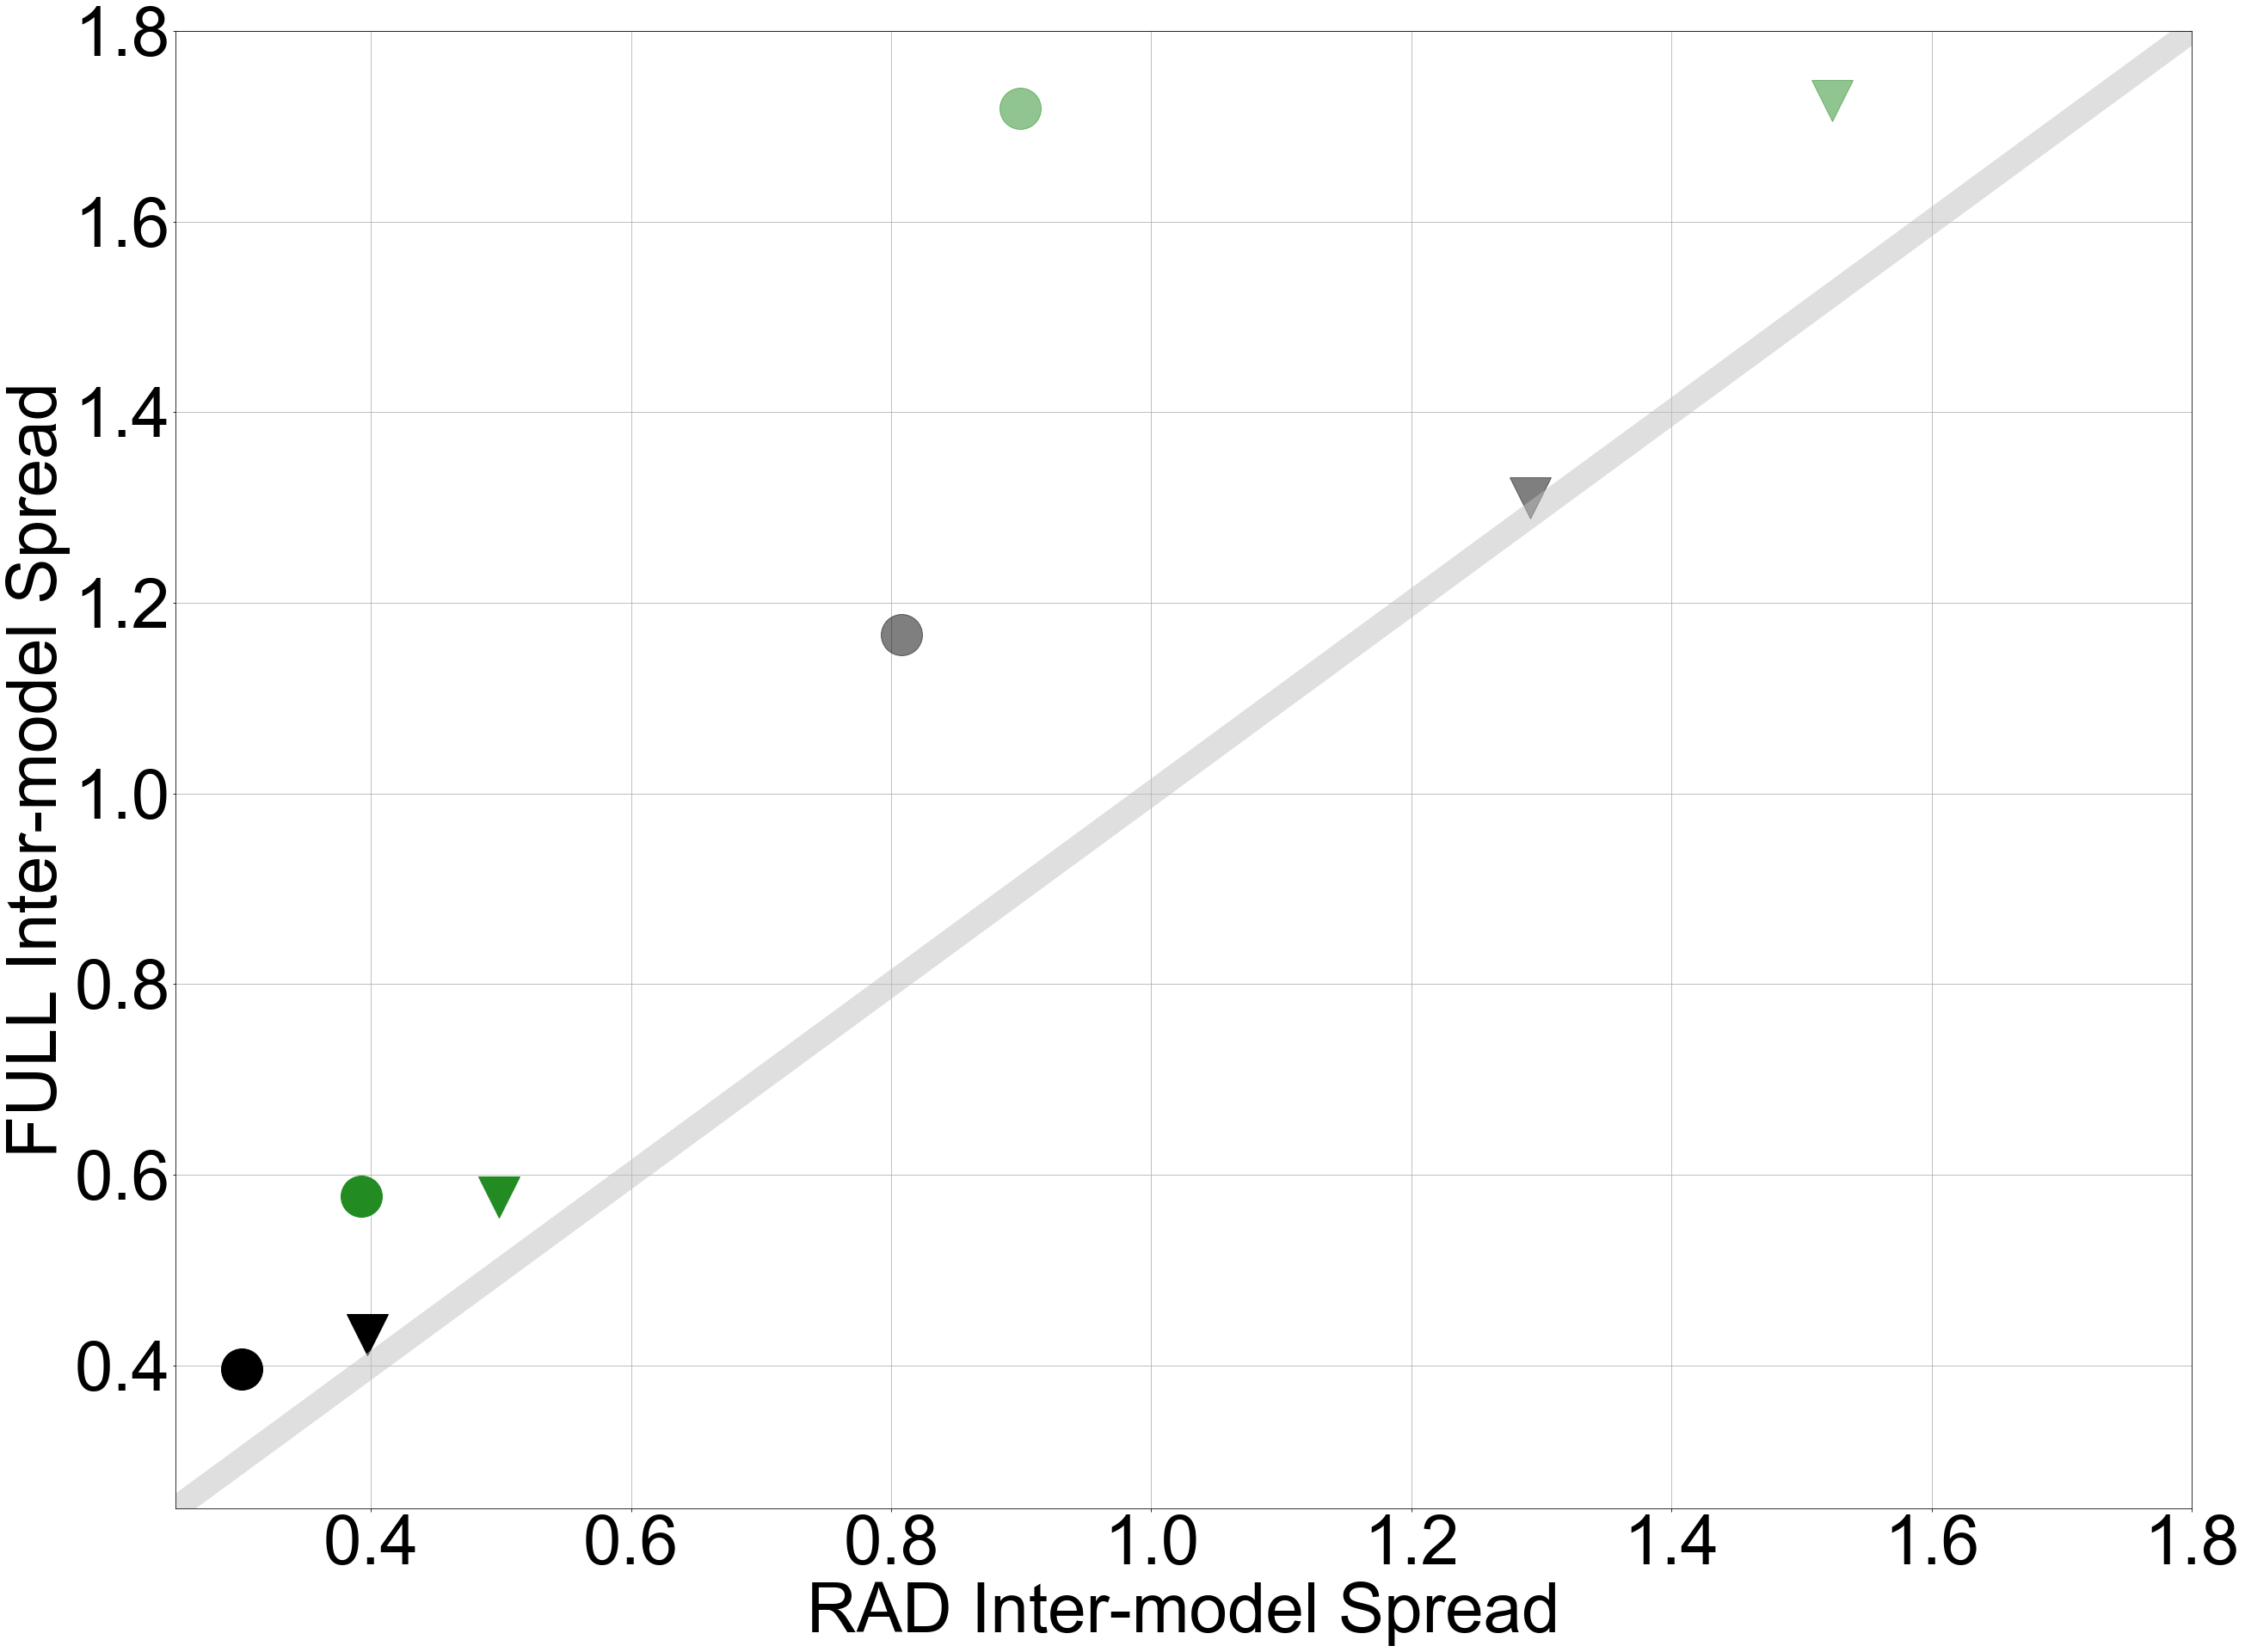

In [80]:
xmin = 0.25
xmax = 1.8
FONTSIZE=40*2
plt.rcParams.update({'font.size': FONTSIZE})
MARKERSIZE=24*2
MARKEREDGEWIDTH=4*2
LINEWIDTH=7*2
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})

fig, ax = plt.subplots(figsize=(21*2,15.8*2))
plt.plot([globalTCR_CMIP5['RAD'].std()], 
         [globalTCR_CMIP5['TOT'].std()],
         markersize=MARKERSIZE, marker='o',color='black',
         label='Global Standard Deviation, CMIP5')
plt.plot([globalTCR_CMIP5['RAD'].max()-globalTCR_CMIP5['RAD'].min()],
         [globalTCR_CMIP5['TOT'].max()-globalTCR_CMIP5['TOT'].min()],
         markersize=MARKERSIZE, marker='o',color='black', alpha=0.5,
         label='Global Model Range, CMIP5')
plt.plot([landTCR_CMIP5['RAD'].std()],
         [landTCR_CMIP5['TOT'].std()],
         markersize=MARKERSIZE, marker='o',color='forestgreen',
         label='Land Standard Deviation, CMIP5')
plt.plot([landTCR_CMIP5['RAD'].max()-landTCR_CMIP5['RAD'].min()],
         [landTCR_CMIP5['TOT'].max()-landTCR_CMIP5['TOT'].min()],
         markersize=MARKERSIZE,marker='o',color='forestgreen', alpha=0.5,
         label='Land Model Range, CMIP5')

plt.plot([globalTCR_CMIP6['RAD'].std()], [globalTCR_CMIP6['TOT'].std()],markersize=MARKERSIZE,
         marker='v',color='black', label='Global Standard Deviation, CMIP6')
plt.plot([globalTCR_CMIP6['RAD'].max()-globalTCR_CMIP6['RAD'].min()], [globalTCR_CMIP6['TOT'].max()-globalTCR_CMIP6['TOT'].min()],
         markersize=MARKERSIZE, marker='v', color='black', alpha=0.5, label='Global Model Range, CMIP6')
plt.plot([landTCR_CMIP6['RAD'].std()], [landTCR_CMIP6['TOT'].std()],markersize=MARKERSIZE,
         marker='v',color='forestgreen', label='Land Standard Deviation, CMIP6')
plt.plot([landTCR_CMIP6['RAD'].max()-landTCR_CMIP6['RAD'].min()], [landTCR_CMIP6['TOT'].max()-landTCR_CMIP6['TOT'].min()],
         markersize=MARKERSIZE,marker='v',color='forestgreen', alpha=0.5, label='Land Model Range, CMIP6')

plt.xlabel('RAD Inter-model Spread')
plt.ylabel('FULL Inter-model Spread')

plt.xlim([xmin, xmax])
plt.ylim([xmin, xmax])
plt.plot([xmin,xmax],[xmin,xmax],color='silver',alpha=0.5,ls='-',linewidth=LINEWIDTH*2)

#plt.legend(fontsize=FONTSIZE, framealpha=1)
plt.grid()

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
              ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(FONTSIZE)

filepath=FIGURE_PATH+'Figure5_Global_Uncertainty_Change_ScatterPlot'
fig.savefig(filepath+'.png', bbox_inches='tight')

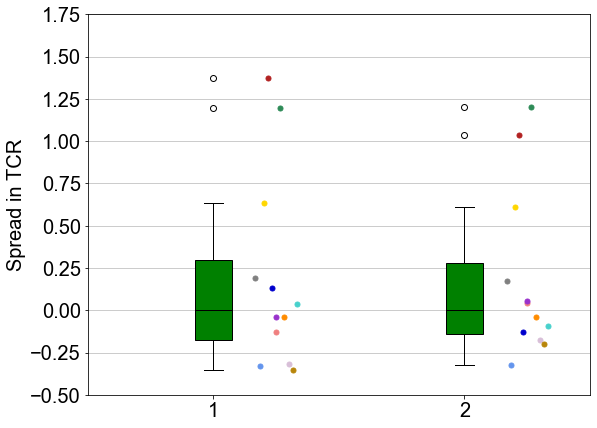

In [78]:
xvals_rand_scatter = [0, 0,
                      1, -1,
                      2, -2,
                      3, -3,
                      4, -4,
                      5, -5]
TCR_dataset = landTCR_CMIP6
box_color='green'
filename='TCR_land'
xvals_rand_scatter=np.array(xvals_rand_scatter)*0.033/2
yvals_RAD = TCR_dataset['RAD'].values
yvals_TOT = TCR_dataset['TOT'].values
yvals_RAD=yvals_RAD-np.median(yvals_RAD)
yvals_TOT=yvals_TOT-np.median(yvals_TOT)

######------------------Get figure settings
fig, ax = plt.subplots(figsize=(9,7))
FONTSIZE=20
from matplotlib import rc
from plants_and_TCR.analysis_parameters import get_CMIP_info
rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rcParams.update({'font.size': FONTSIZE})
CMIP_CHOICE = 'CMIP5and6'
CMIP6_cutoff=8
COLORS = get_CMIP_info.get_colors(CMIP_CHOICE)
COLORS=COLORS[CMIP6_cutoff:100]
bplot = plt.boxplot([yvals_TOT, yvals_RAD],patch_artist=True)
for i in range(0,len(yvals_RAD)):
    plt.plot(xvals_rand_scatter[i]+1.25, yvals_TOT[i],'.',color=COLORS[i],markersize=10)
    plt.plot(xvals_rand_scatter[i]+2.25, yvals_RAD[i],'.',color=COLORS[i],markersize=10)
plt.xlim(np.array([-0.5,1.5])+1)
plt.ylabel('Spread in TCR')
plt.ylim([-0.5,1.75])
plt.grid(color='black', which='major', axis='y',alpha=0.25)


for patch in bplot['medians']:
    patch.set_color('black')
    
for patch in bplot['boxes']:
    patch.set_facecolor(box_color)

fig.savefig(FIGURE_PATH+filename+'.png', bbox_inches='tight')

### Text

In [7]:
print('STDDEV')
print('------Global------')
print(globalTCR_CMIP6.std()*100/globalTCR_CMIP6['TOT'].std())
print('------Land------')
print(landTCR_CMIP6.std()*100/landTCR_CMIP6['TOT'].std())

STDDEV
------Global------
RAD     91.865034
TOT    100.000000
dtype: float64
------Land------
RAD     86.415168
TOT    100.000000
dtype: float64


In [8]:
print('INTER-MODEL RANGE')
print('------Global------')
print((globalTCR_CMIP6.max() - globalTCR_CMIP6.min())*100/(globalTCR_CMIP6['TOT'].max() - globalTCR_CMIP6['TOT'].min()))
print('------Land------')
print((landTCR_CMIP6.max() - landTCR_CMIP6.min())*100/(landTCR_CMIP6['TOT'].max() - landTCR_CMIP6['TOT'].min()))

INTER-MODEL RANGE
------Global------
RAD     98.572502
TOT    100.000000
dtype: float64
------Land------
RAD     88.241032
TOT    100.000000
dtype: float64


# ***Old visualization options***

### Option 1 (unused)

[0.75 1.   1.25 1.5  1.75 2.   2.25]
[0.75 1.   1.25 1.5  1.75 2.   2.25]


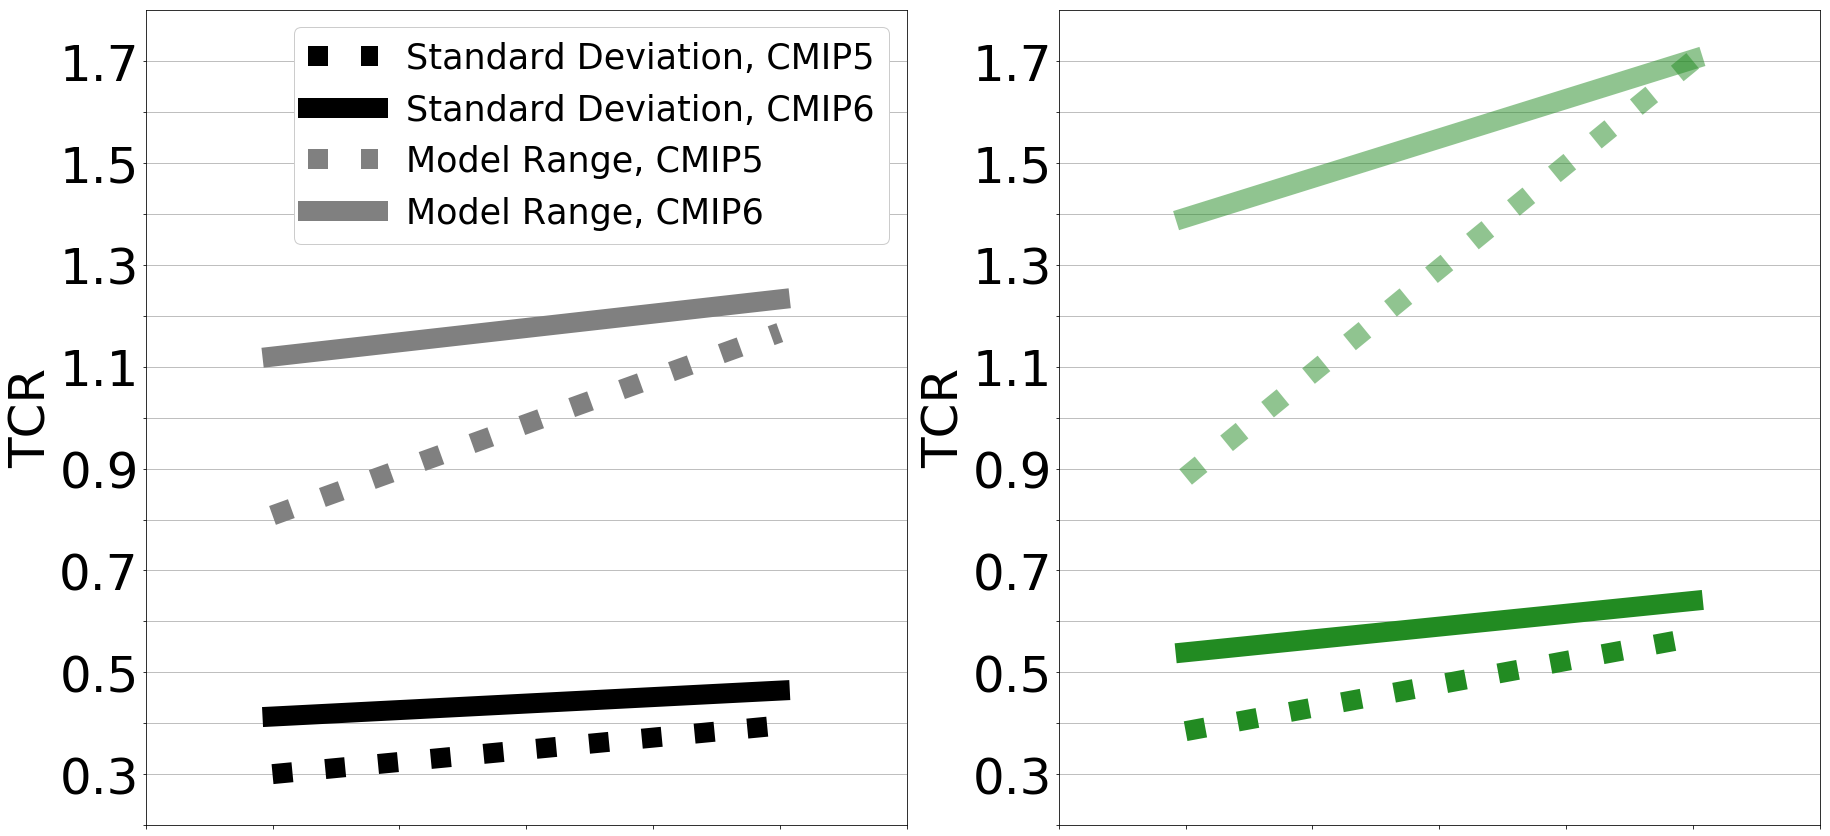

In [10]:
fig, ax = plt.subplots(figsize=(30,15))
ax = plt.subplot(1, 2, 1)
plt.plot(xvals,globalTCR_CMIP5.std().values,linewidth=LINEWIDTH,linestyle=':',color='black', label='Standard Deviation, CMIP5')
plt.plot(xvals,globalTCR_CMIP6.std().values, linewidth=LINEWIDTH,color='black', label='Standard Deviation, CMIP6')
plt.plot(xvals,globalTCR_CMIP5.max().values-globalTCR_CMIP5.min().values,
         linewidth=LINEWIDTH,linestyle=':',color='gray', label='Model Range, CMIP5')
plt.plot(xvals,globalTCR_CMIP6.max().values-globalTCR_CMIP6.min().values,
         linewidth=LINEWIDTH,color='gray', label='Model Range, CMIP6')
modify_plot_settings()
plt.legend(fontsize=35, framealpha=1)

ax = plt.subplot(1, 2, 2)
plt.plot(xvals,landTCR_CMIP5.std().values,linewidth=LINEWIDTH,linestyle=':',color='forestgreen', label='Standard Deviation, CMIP5')
plt.plot(xvals,landTCR_CMIP6.std().values, linewidth=LINEWIDTH,color='forestgreen', label='Standard Deviation, CMIP6')
plt.plot(xvals,landTCR_CMIP5.max().values-landTCR_CMIP5.min().values,
         linewidth=LINEWIDTH,linestyle=':',color='forestgreen', label='Model Range, CMIP5', alpha=0.5)
plt.plot(xvals,landTCR_CMIP6.max().values-landTCR_CMIP6.min().values,
         linewidth=LINEWIDTH,color='forestgreen', label='Model Range, CMIP6', alpha=0.5)
modify_plot_settings()

filepath=FIGURE_PATH+'Global_Uncertainty_Change'
fig.savefig(filepath+'.png', bbox_inches='tight')

### Option 2 (unused)

[0.75 1.   1.25 1.5  1.75 2.   2.25]
[0.75 1.   1.25 1.5  1.75 2.   2.25]


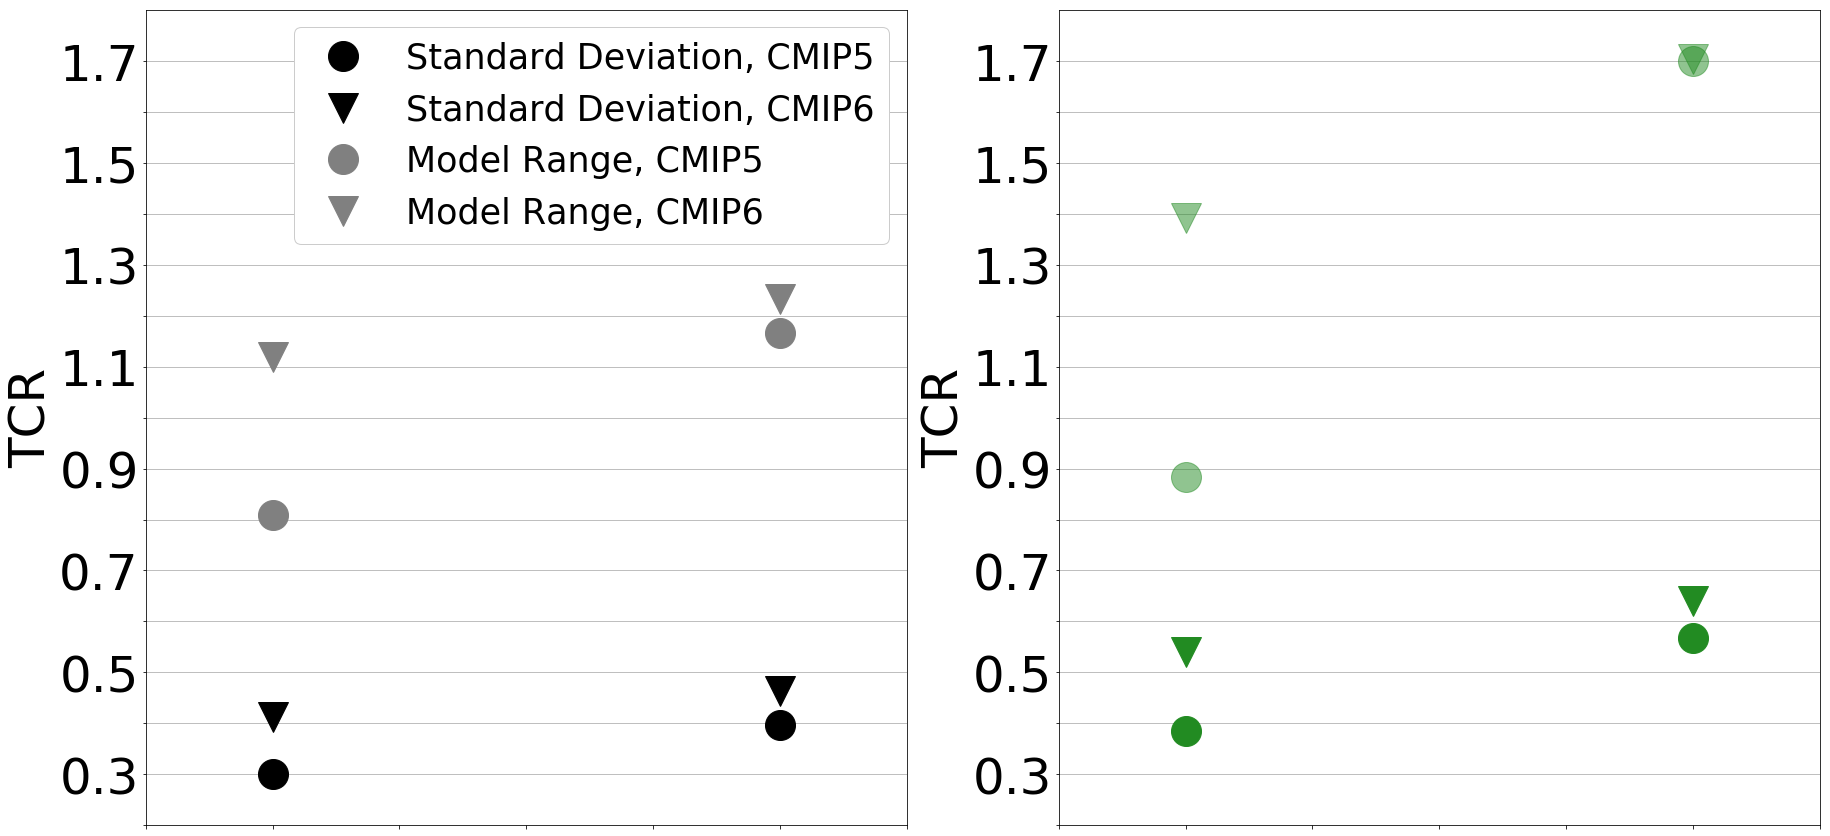

In [37]:
fig, ax = plt.subplots(figsize=(30,15))
MARKERSIZE=30
ax = plt.subplot(1, 2, 1)
plt.plot(xvals,globalTCR_CMIP5.std().values,markersize=MARKERSIZE,linewidth=0,
         marker='o',color='black', label='Standard Deviation, CMIP5')
plt.plot(xvals,globalTCR_CMIP6.std().values,markersize=MARKERSIZE,linewidth=0,
         marker='v',color='black', label='Standard Deviation, CMIP6')
plt.plot(xvals,globalTCR_CMIP5.max().values-globalTCR_CMIP5.min().values, markersize=MARKERSIZE,linewidth=0,
         marker='o',color='gray', label='Model Range, CMIP5')
plt.plot(xvals,globalTCR_CMIP6.max().values-globalTCR_CMIP6.min().values, markersize=MARKERSIZE,linewidth=0,
         marker='v',color='gray', label='Model Range, CMIP6')
modify_plot_settings()
plt.legend(fontsize=35, framealpha=1)

ax = plt.subplot(1, 2, 2)
plt.plot(xvals,landTCR_CMIP5.std().values,markersize=MARKERSIZE,linewidth=0,
         marker='o',color='forestgreen', label='Standard Deviation, CMIP5')
plt.plot(xvals,landTCR_CMIP6.std().values, markersize=MARKERSIZE,linewidth=0,
         marker='v', color='forestgreen',label='Standard Deviation, CMIP6')
plt.plot(xvals,landTCR_CMIP5.max().values-landTCR_CMIP5.min().values,markersize=MARKERSIZE,linewidth=0,
         marker='o', color='forestgreen', label='Model Range, CMIP5', alpha=0.5)
plt.plot(xvals,landTCR_CMIP6.max().values-landTCR_CMIP6.min().values, markersize=MARKERSIZE,linewidth=0,
         marker='v',color='forestgreen', label='Model Range, CMIP6', alpha=0.5)
modify_plot_settings()

filepath=FIGURE_PATH+'Global_Uncertainty_Change'
fig.savefig(filepath+'.png', bbox_inches='tight')